In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

In [4]:
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [5]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [6]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 2
City                                                   2
State                                                  0
Postal Code                                            2
Model Year                                             0
Make                                                   0
Model                                                181
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 297
DOL Vehicle ID                                         0
Vehicle Location                                      29
Electric Utility                                     473
2020 Census Tract                                      2
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Legislative District', ylabel='Density'>

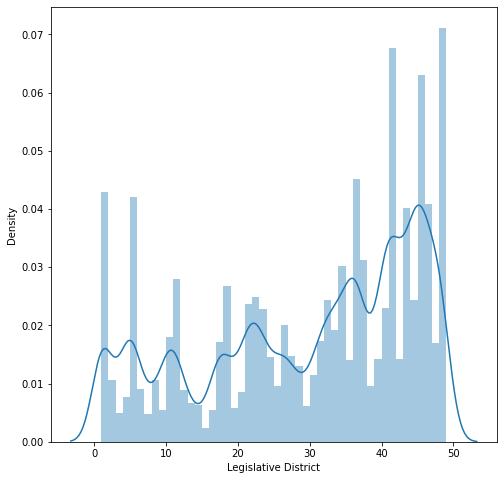

In [7]:
#central tendencies
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(data['Legislative District'])

In [8]:
data['Legislative District'].fillna(data['Legislative District'].median(),inplace=True)

In [9]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 2
City                                                   2
State                                                  0
Postal Code                                            2
Model Year                                             0
Make                                                   0
Model                                                181
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                   0
DOL Vehicle ID                                         0
Vehicle Location                                      29
Electric Utility                                     473
2020 Census Tract                                      2
dtype: int64

In [10]:
correlation = data.corr()

<AxesSubplot:>

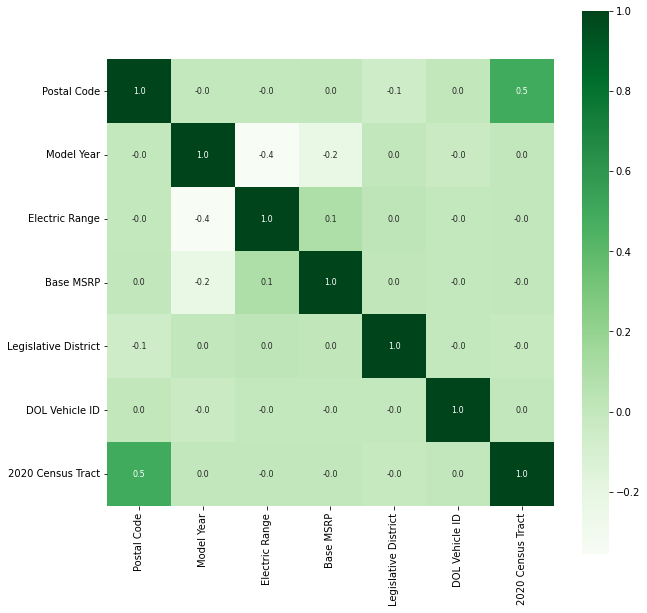

In [11]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [12]:
data.shape

(124716, 17)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Postal Code', ylabel='Density'>

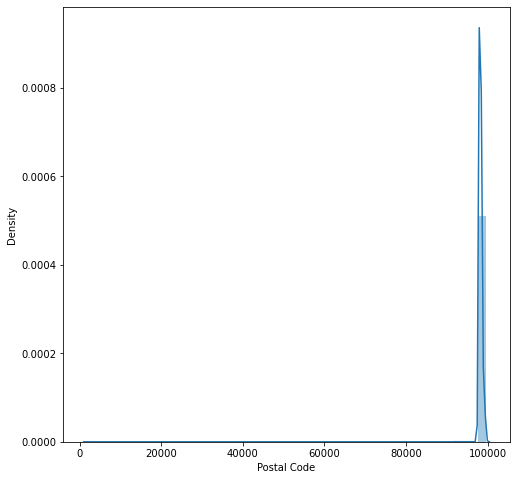

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(data['Postal Code'])

In [14]:
data['Postal Code'].fillna(data['Postal Code'].median(),inplace=True)

(array([2.0000e+00, 1.3000e+01, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.2000e+01, 2.4000e+01, 2.4960e+03, 8.1900e+03,
        1.0637e+04, 8.5580e+03, 2.4674e+04, 2.9222e+04, 4.0875e+04]),
 array([1997.        , 1998.73333333, 2000.46666667, 2002.2       ,
        2003.93333333, 2005.66666667, 2007.4       , 2009.13333333,
        2010.86666667, 2012.6       , 2014.33333333, 2016.06666667,
        2017.8       , 2019.53333333, 2021.26666667, 2023.        ]),
 <BarContainer object of 15 artists>)

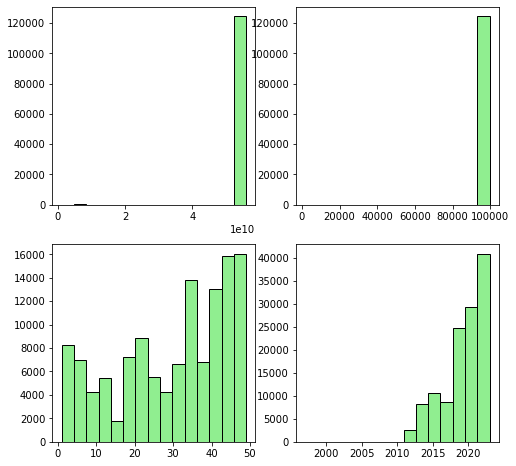

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
ax[0,0].hist(data['2020 Census Tract'], color='lightgreen', ec='black', bins=15)
ax[0,1].hist(data['Postal Code'], color='lightgreen', ec='black', bins=15)
ax[1,0].hist(data['Legislative District'], color='lightgreen', ec='black', bins=15)
ax[1,1].hist(data['Model Year'], color='lightgreen', ec='black', bins=15)

In [16]:
data['2020 Census Tract'].fillna(data['2020 Census Tract'].median(),inplace=True)

In [17]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 2
City                                                   2
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                181
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                   0
DOL Vehicle ID                                         0
Vehicle Location                                      29
Electric Utility                                     473
2020 Census Tract                                      0
dtype: int64

In [18]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [19]:
data.replace({'Electric Vehicle Type':{'Battery Electric Vehicle (BEV)':0 , 'Plug-in Hybrid Electric Vehicle (PHEV)':1}}, inplace=True)

In [20]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,0,Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,0,Clean Alternative Fuel Vehicle Eligible,220,0,34.0,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,1,Not eligible due to low battery range,22,0,34.0,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,0,Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,1,Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [21]:
data.replace({'Clean Alternative Fuel Vehicle (CAFV) Eligibility':{'Clean Alternative Fuel Vehicle Eligible':2 , 'Not eligible due to low battery range':3,'Eligibility unknown as battery range has not been researched':4}}, inplace=True)

In [22]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,0,2,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,0,2,220,0,34.0,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,1,3,22,0,34.0,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,0,2,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,1,3,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [23]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,0,2,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,0,2,220,0,34.0,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,1,3,22,0,34.0,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,0,2,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,1,3,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [25]:
csv_data = data.to_csv('After cleaning.csv', index = True)

In [440]:
#features and targets
X = data.drop(columns = ['VIN (1-10)','County','City','State','Vehicle Location','Make','Model','Electric Range','Electric Utility'],axis=1)
Y = data['Electric Range']

In [441]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,0,2,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,0,2,220,0,34.0,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,1,3,22,0,34.0,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,0,2,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,1,3,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [442]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) 

In [443]:
regressor = RandomForestRegressor(n_estimators=100)

In [444]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [445]:
test_data_prediction = regressor.predict(X_test)

In [446]:
print(test_data_prediction)

[  0.   209.83  38.   ...   0.   221.89  43.77]


In [447]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.9322726311360114


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


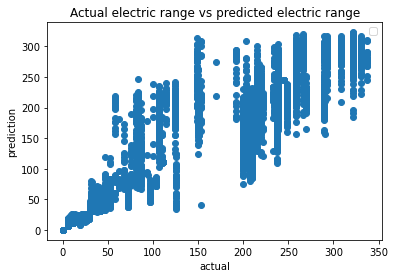

In [448]:
plt.scatter(Y_test, test_data_prediction)
plt.title('Actual electric range vs predicted electric range')
plt.xlabel('actual')
plt.ylabel('prediction')
plt.legend()
plt.show()

In [449]:
print(X)

        Postal Code  Model Year  Electric Vehicle Type  \
0           98908.0        2020                      0   
1           92101.0        2019                      0   
2           97404.0        2021                      1   
3           98908.0        2019                      0   
4           98021.0        2017                      1   
...             ...         ...                    ...   
124711      98272.0        2022                      0   
124712      98406.0        2020                      1   
124713      98226.0        2023                      0   
124714      98444.0        2018                      0   
124715      99320.0        2015                      1   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Base MSRP  \
0                                                       2          0   
1                                                       2          0   
2                                                       3          0   
3              

In [450]:
input_data = (99320,2015,1,2,0,16,476974718,53005011900)


In [451]:
input_data_as_array = np.asarray(input_data)

In [452]:
input_data_reshaped = input_data_as_array.reshape(1,-1)

In [453]:
prediction = regressor.predict(input_data_reshaped)
print(prediction)

[42.42]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [454]:

#model training
lasso_regressor = Lasso()


In [455]:
lasso_regressor.fit(X_train,Y_train)

Lasso()

In [456]:
training_data_prediction = lasso_regressor.predict(X_train)

In [457]:
r2_train_2 = metrics.r2_score(Y_train,training_data_prediction)

In [458]:
print(r2_train_2)


0.7984588528654217


In [459]:
lasso_regressor.fit(X_test,Y_test)

Lasso()

In [460]:
test_data_prediction = lasso_regressor.predict(X_test)

In [461]:
r2_test_2 = metrics.r2_score(Y_test,test_data_prediction)

In [462]:
print(r2_test_2)

0.8032373788945151


In [468]:
input_data = (99320,2015,1,2,0,16,476974718,53005011900)


In [469]:
input_data_as_array = np.asarray(input_data)

In [470]:
input_data_reshaped = input_data_as_array.reshape(1,-1)

In [471]:
prediction = regressor.predict(input_data_reshaped)
print(prediction)

[42.42]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


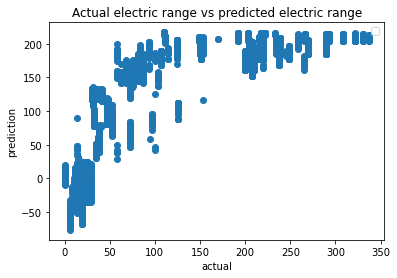

In [472]:
plt.scatter(Y_test, test_data_prediction)
plt.title('Actual electric range vs predicted electric range')
plt.xlabel('actual')
plt.ylabel('prediction')
plt.legend()
plt.show()